In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# MNIST Fashion Dataset -> Hands on Project


## Splitting, Exploring, Normalizing the Dataset

In [2]:
Fashion_MNIST = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = Fashion_MNIST
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_train.type : {X_train.dtype}, y_train.dtype {y_train.dtype}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

print(f"X_test:\n {X_test[:2]}, y_test: {y_test[:5]}")

X_train: (60000, 28, 28), y_train: (60000,), X_train.type : uint8, y_train.dtype uint8
X_test: (10000, 28, 28), y_test: (10000,)
X_test:
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]], y_test: [9 2 1 1 6]


- Dtype - uint8 -> Meaning data in range of 0-255
- Therefore we need to bring data in range of 0-1 otherwise weights will get to high and will leed to slow computation
#### Splitting Training Data into validation data and Normalizing data

In [3]:
X_valid, X_train = X_train[:5000]/255., X_train[5000:]/255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test/255.

#### Plotting Image 

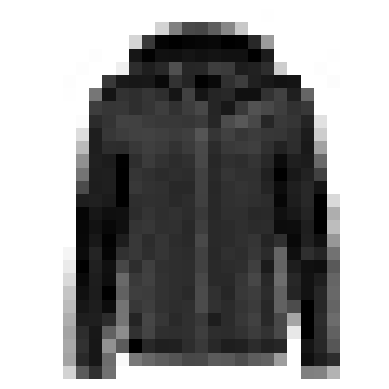

In [4]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off") # To remove Axis from Plot
plt.show()

#### Labeling y_train with Corresponding Class Names

In [5]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Sandal", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_name[y_train[0]]

'Coat'

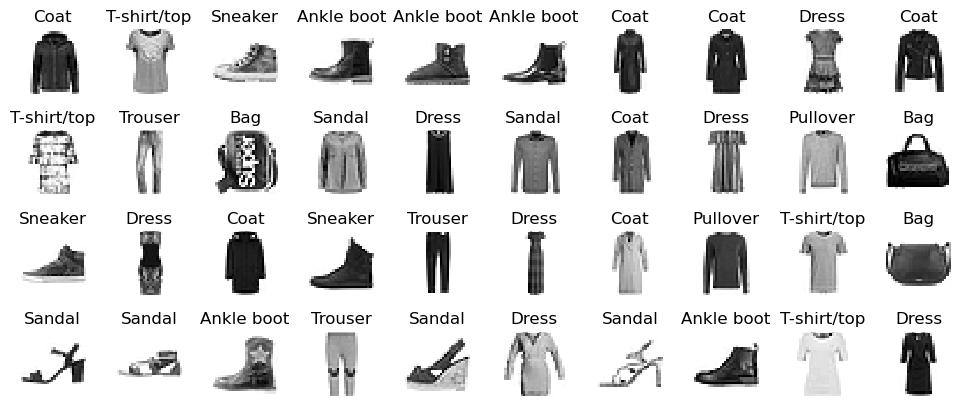

In [7]:
n_rows = 4
n_columns = 10
plt.figure(figsize=(n_columns* 1.2, n_rows*1.2))
for row in range(n_rows):
    for columns in range(n_columns):
        index = n_columns * row + columns
        plt.subplot(n_rows, n_columns, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_name[y_train[index]])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

## Building NN with Tensorflow and Keras

#### Initial Model 
- 2 Hidden Dense Layers
      - Dense1 = 300 Neurons
      - Dense2 = 100 Neurons
      - Activation = relu
- Output Dense Layer
      - Dense_output = 10 Neurons
      - Activation = softmax

In [46]:
# Sequential model Creation
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# Keras will Randomly Initialize Weights Randomly
# So as to Reproduce the Results we will fix how weights are initiated.

keras.backend.clear_session() # Clears the current Keras/TensorFlow session.
np.random.seed(42) # Ensures that whenever NumPy generates random numbers, the sequence will always be the same.
tf.random.set_seed(42) # Ensures that TensorFlow operations involving randomness behave deterministically.

In [48]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics=[keras.metrics.sparse_categorical_accuracy])
#model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.sparse_categorical_accuracy])

#### Training the Neural Network

In [49]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - loss: 0.9815 - sparse_categorical_accuracy: 0.6855 - val_loss: 0.5230 - val_sparse_categorical_accuracy: 0.8204
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - loss: 0.5060 - sparse_categorical_accuracy: 0.8233 - val_loss: 0.4572 - val_sparse_categorical_accuracy: 0.8424
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - loss: 0.4513 - sparse_categorical_accuracy: 0.8411 - val_loss: 0.4248 - val_sparse_categorical_accuracy: 0.8538
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - loss: 0.4211 - sparse_categorical_accuracy: 0.8518 - val_loss: 0.4038 - val_sparse_categorical_accuracy: 0.8626
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - loss: 0.3991 - sparse_categorical_accuracy: 0.8591 - val_loss: 0.3883 - val_sparse_categorical_accuracy: 0.8656
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - loss: 0.3821 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.3766 - val_sparse_categoric

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


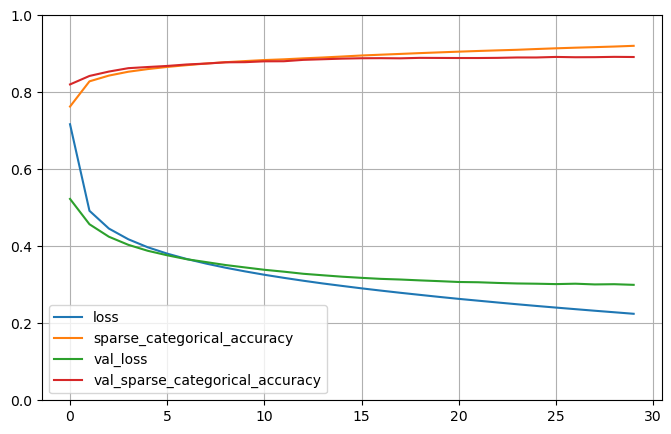

In [50]:
print(history.params)
print(history.history.keys())

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Testing the Model

In [51]:
accurrazy = model.evaluate(X_test, y_test)
print(accurrazy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 0.3481 - sparse_categorical_accuracy: 0.8794
[0.34454765915870667, 0.8794000148773193]


##### Testing Model 

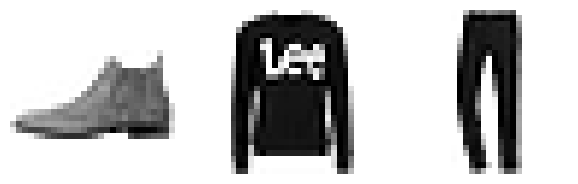

In [53]:
X_new = X_test[:3]

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index+1)
    plt.imshow(image, cmap='binary', interpolation="nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[9 2 1]


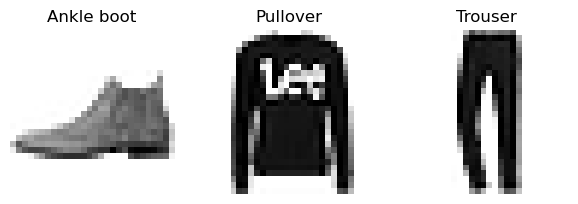

In [59]:
predictions = np.argmax(model.predict(X_new), axis=-1)

print(predictions)

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index+1)
    plt.imshow(image, cmap='binary', interpolation="nearest")
    plt.axis("off")
    plt.title(class_name[predictions[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


#### Exploring Model

In [10]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

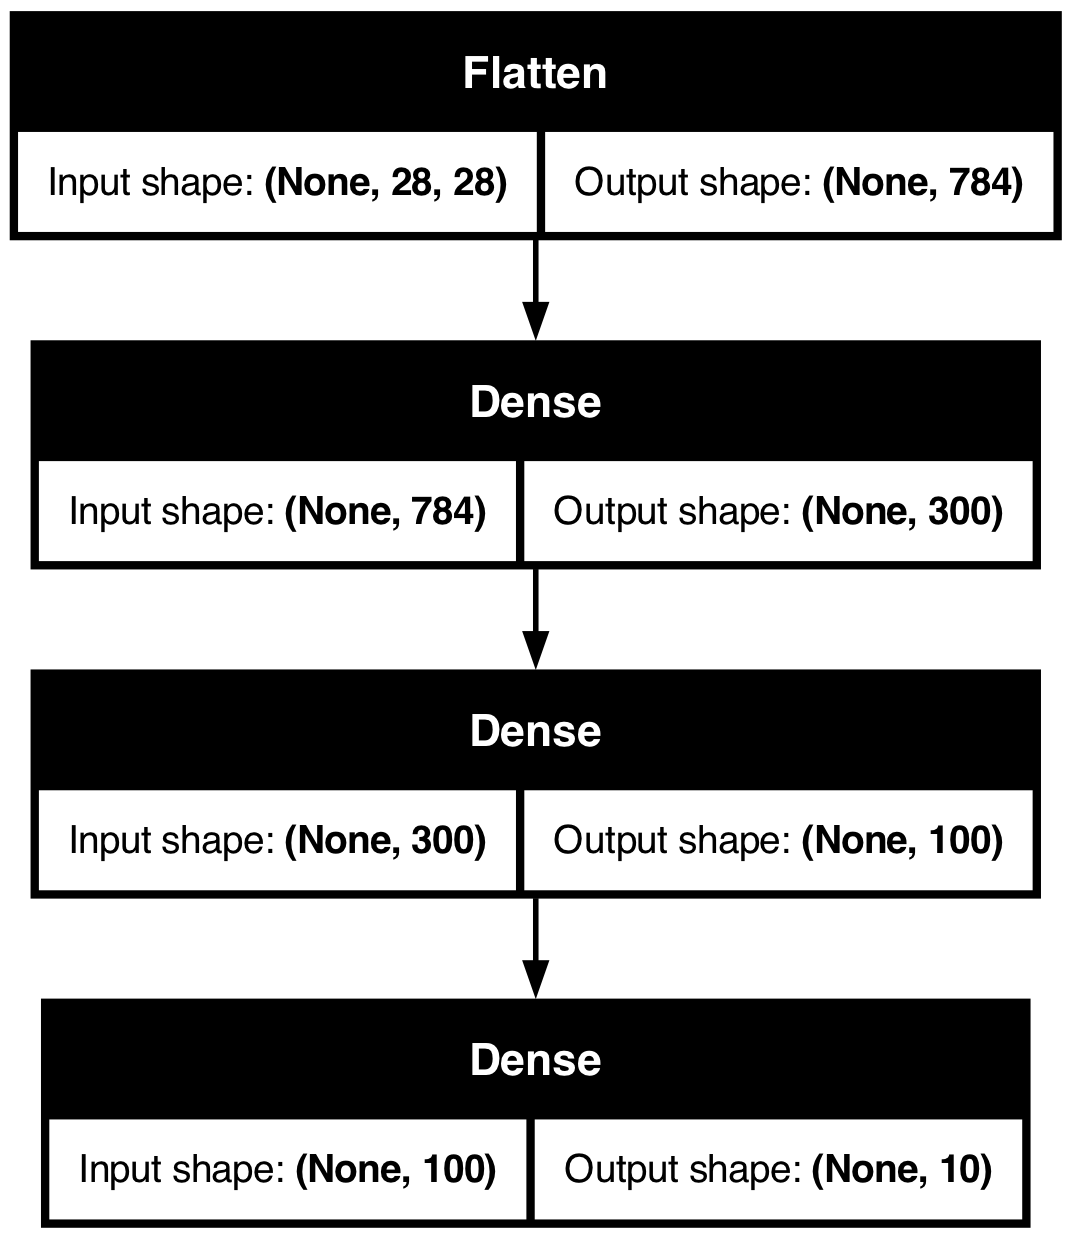

In [18]:
import pydot
import graphviz
from keras.utils import plot_model
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)


In [23]:
hidden1 = model.layers[1]
print(hidden1.name)

weights, biases = hidden1.get_weights()
print(weights)
print(biases)

dense
[[ 0.00481618  0.00355545  0.01605865 ... -0.03647368  0.05094284
   0.0105304 ]
 [ 0.06779839 -0.01263941 -0.01478342 ... -0.04373074  0.05917272
   0.04047514]
 [ 0.02567501  0.03077461 -0.05670848 ...  0.02932306  0.02114675
   0.00780932]
 ...
 [-0.00010912  0.06545101  0.01996422 ... -0.05096353  0.06919539
   0.05576907]
 [ 0.06451486  0.01616473 -0.03423461 ... -0.02983154 -0.06412099
  -0.03621048]
 [ 0.05519323 -0.03918301 -0.02961441 ...  0.00112212  0.02612443
   0.00607622]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [26]:
print(f"weights : {weights.shape}, biases : {biases.shape}")

weights : (784, 300), biases : (300,)
